In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt               #for plotting and EDA
import seaborn as sns                         #for plotting and EDA
from sklearn.linear_model import LogisticRegression             #classification model
from sklearn.naive_bayes import GaussianNB                      #classification model
from sklearn.tree import DecisionTreeClassifier                 #classification model
from sklearn.ensemble import RandomForestClassifier             #classification model
from sklearn.svm import SVC                                     #classification model
from sklearn.model_selection import train_test_split            #for splitting dataset into training and testing
from sklearn.metrics import accuracy_score                      #for checking model accuracy
from sklearn.metrics import roc_auc_score                       #for checking model accuracy
from sklearn.metrics import confusion_matrix, classification_report      #for checking model accuracy
from sklearn.model_selection import cross_val_score                      #for cross validating model
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Importing the data set
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")

In [4]:
df.head(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [5]:
df.shape

(32560, 15)

In [6]:
df.dtypes


Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [7]:
df.apply(lambda x: len(x.unique()))


Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [8]:
#Checking the despcription
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
#Checking null values
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

No null values are present in dataset

#  EDA and Data visualization

In [10]:
tp = (df.dtypes == 'object')
cat_coloumn = list(tp[tp].index)

print(cat_coloumn)

['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


In [12]:
p = (df.dtypes == 'int64')
cont_coloumn = list(p[p].index)

print(cont_coloumn)

['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']


In [13]:
cont_coloumn.remove('Education_num')

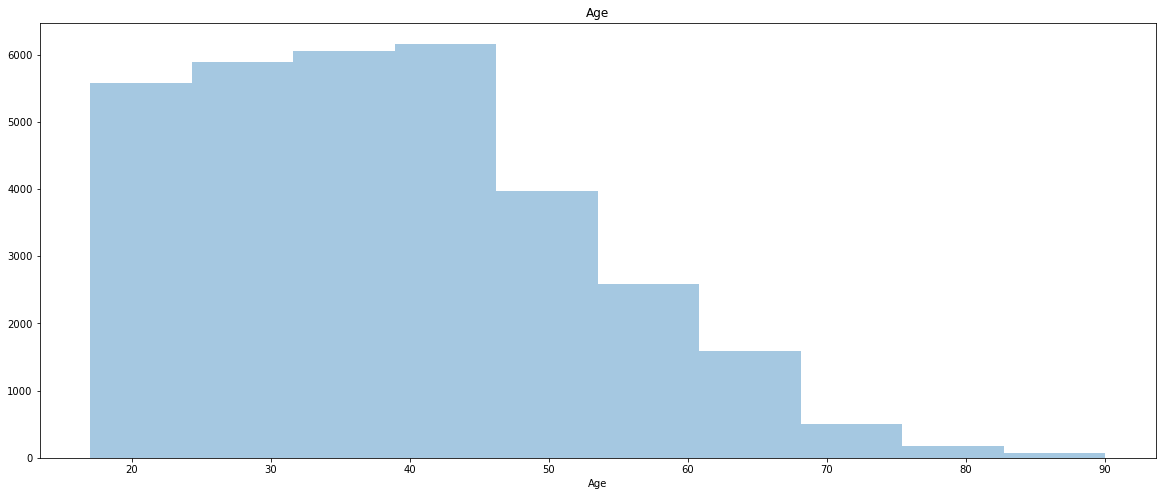

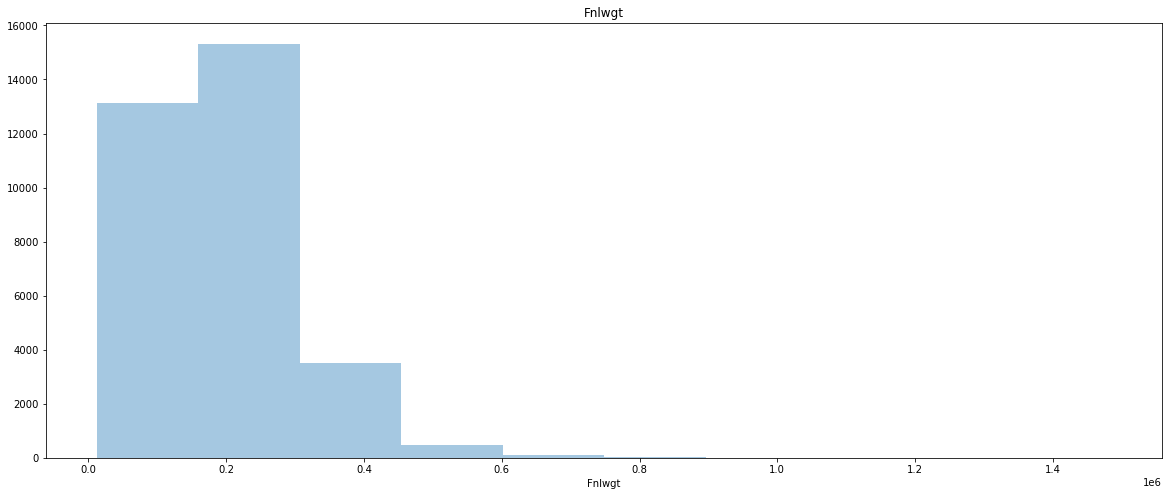

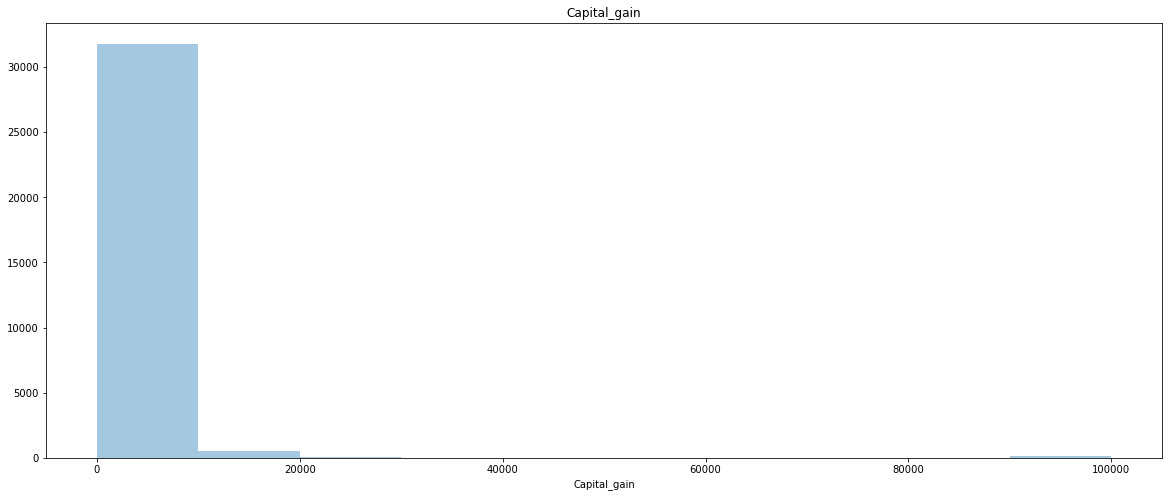

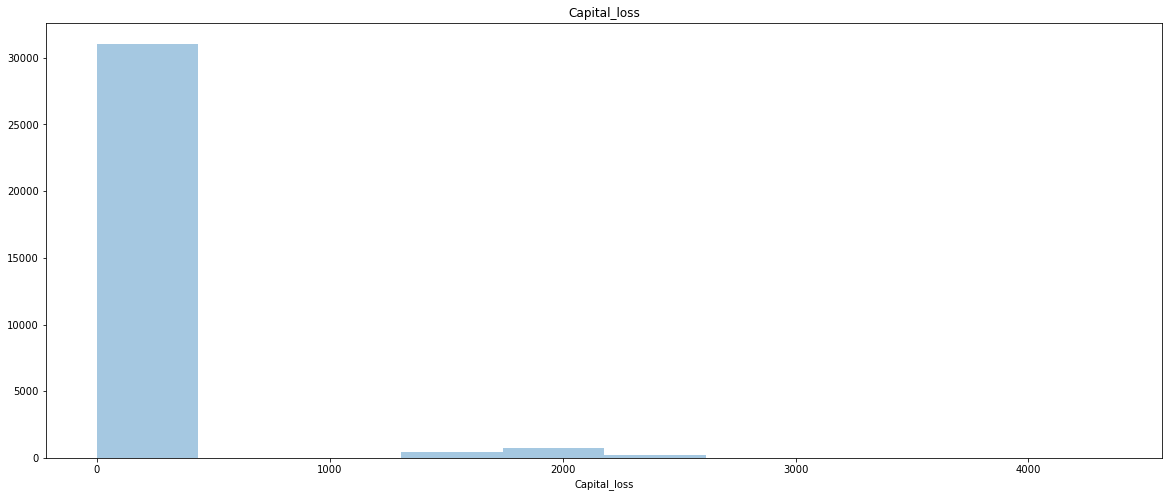

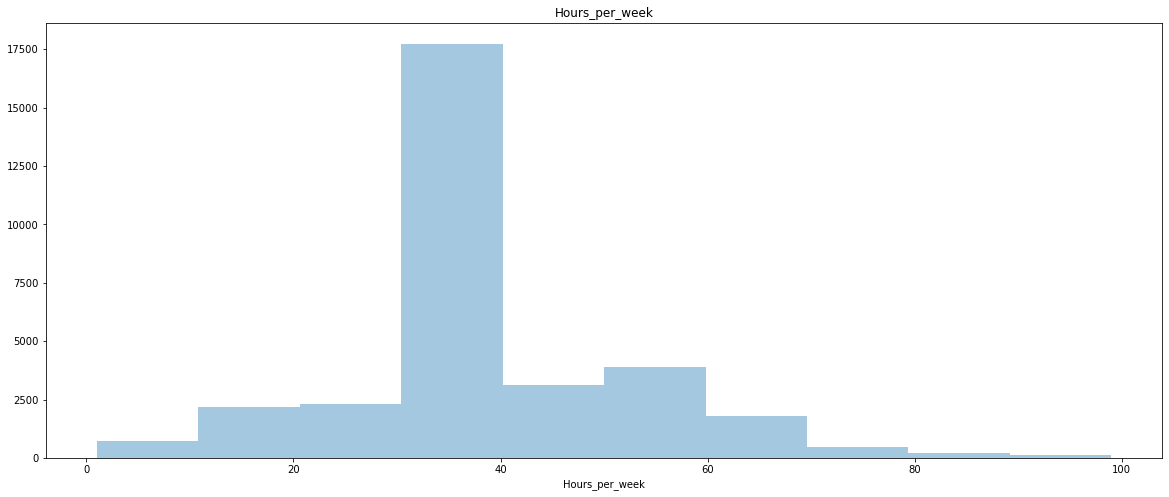

In [15]:
#Univariate analysis
for i in cont_coloumn:                                 
    plt.figure(figsize = (20, 8))
    sns.distplot(a= df[i], bins = 10, kde= False)
    plt.title(i)
    plt.show()

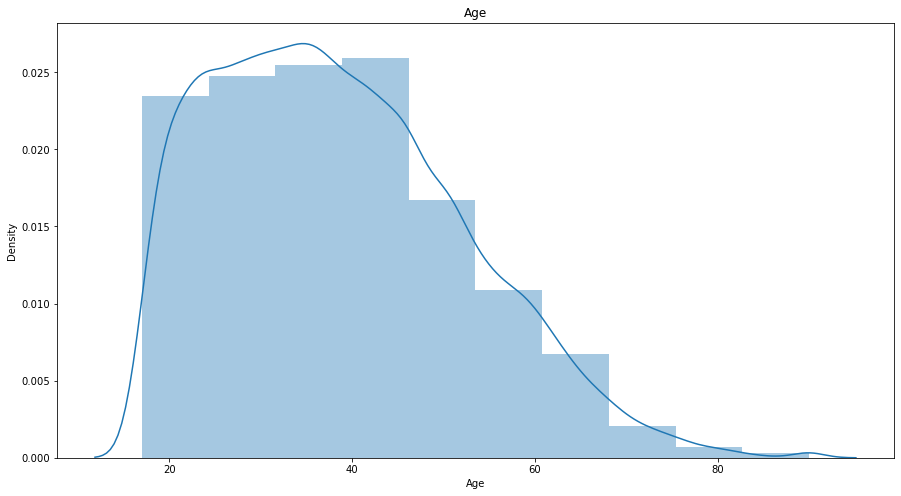

In [16]:
plt.figure(figsize = (15, 8))
sns.distplot(df['Age'], bins = 10)
plt.title('Age')
plt.show()

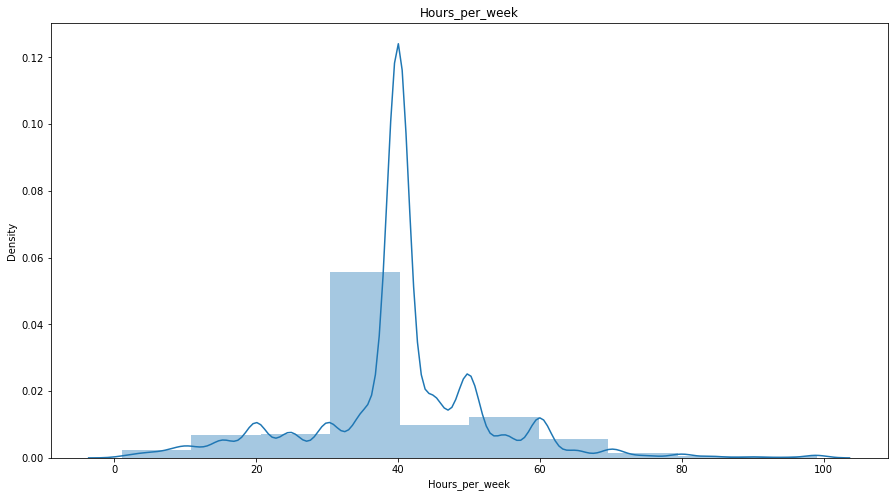

In [17]:
plt.figure(figsize = (15, 8))
sns.distplot(df['Hours_per_week'], bins = 10)
plt.title('Hours_per_week')
plt.show()

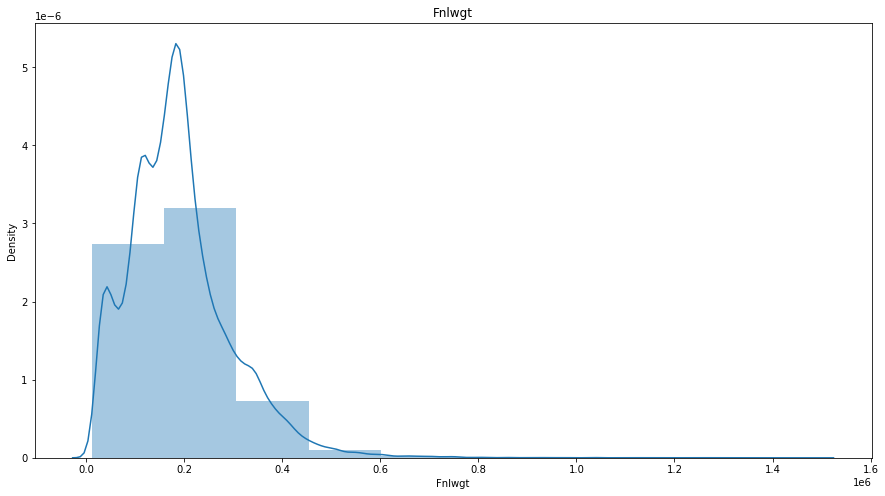

In [18]:
plt.figure(figsize = (15, 8))
sns.distplot(df['Fnlwgt'], bins = 10)
plt.title('Fnlwgt')
plt.show()

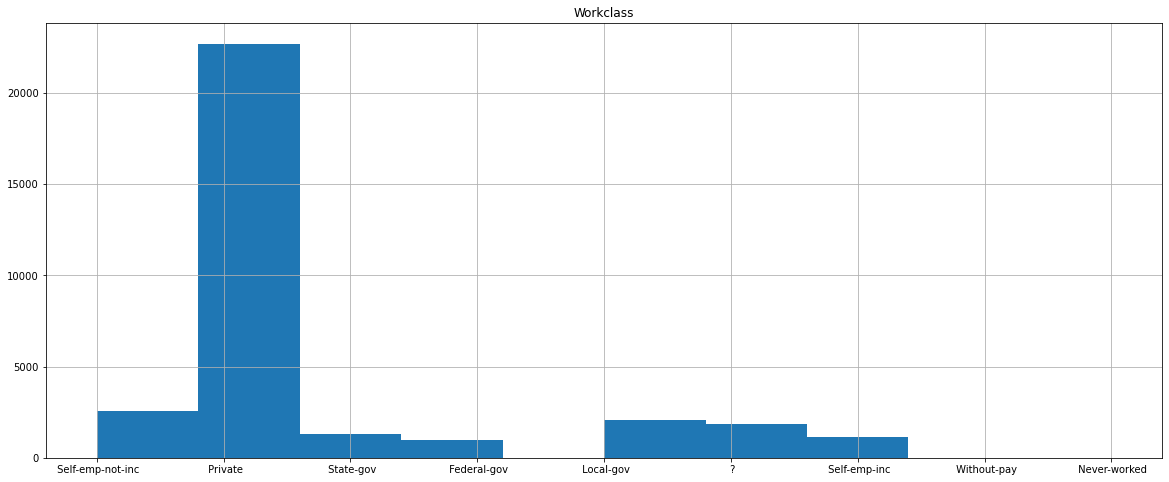

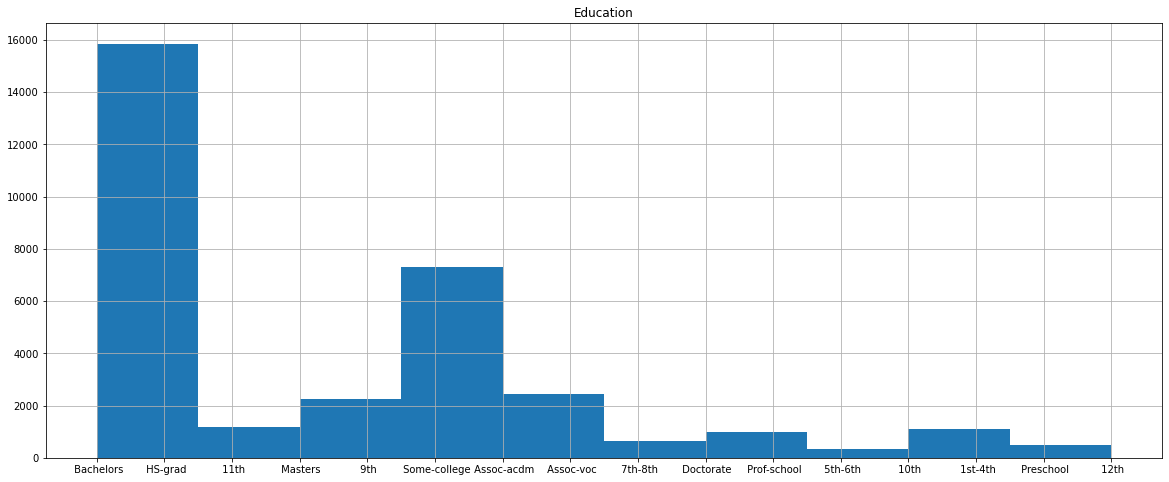

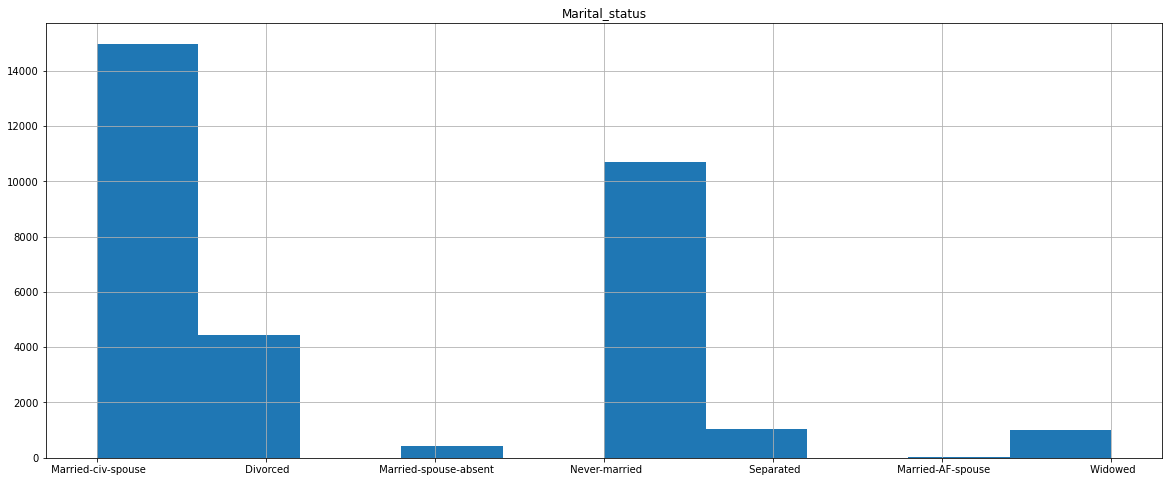

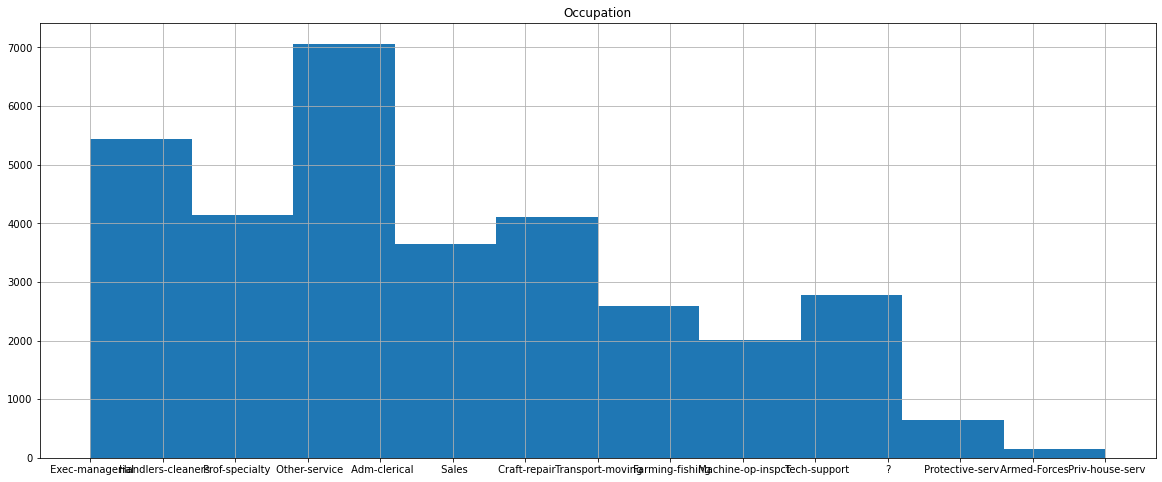

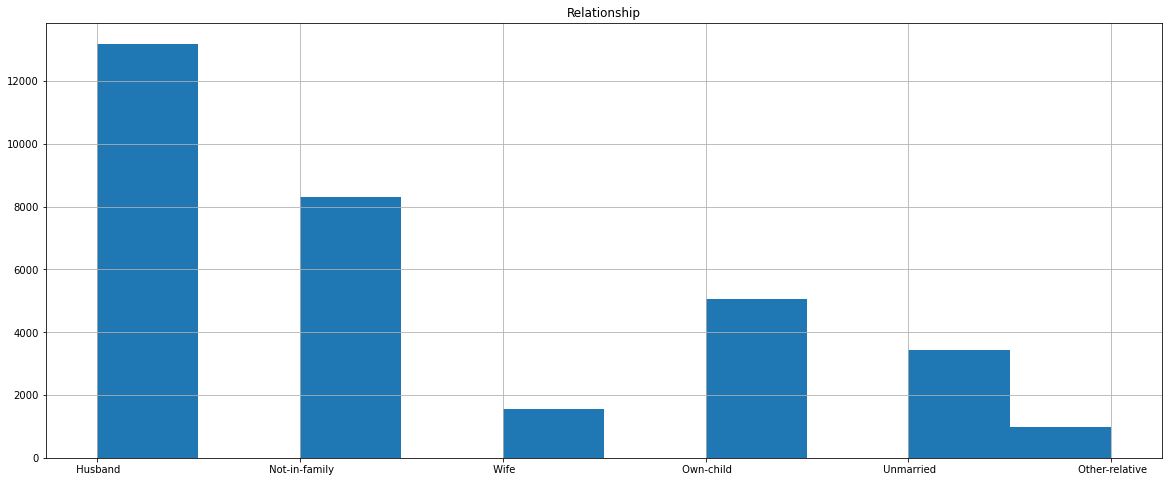

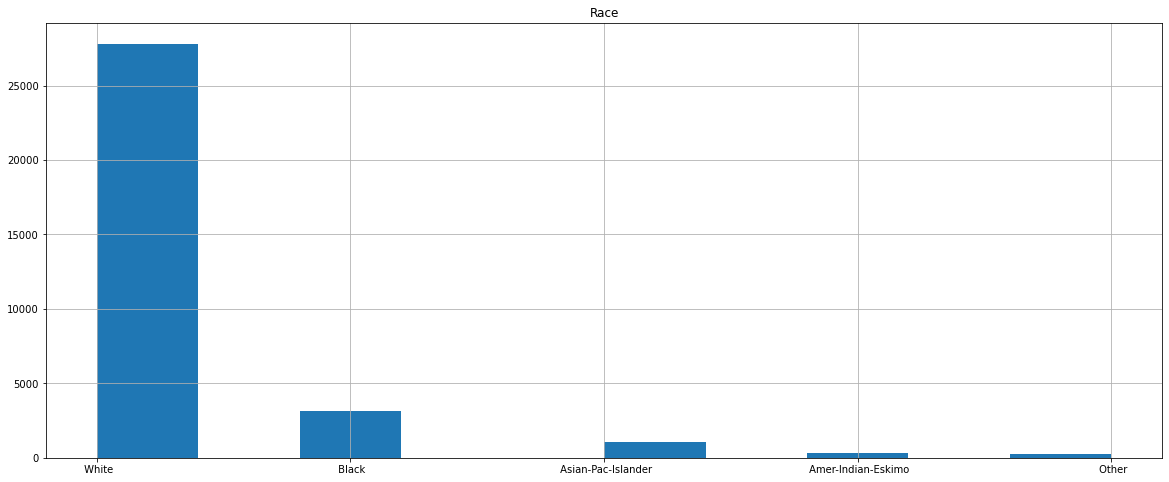

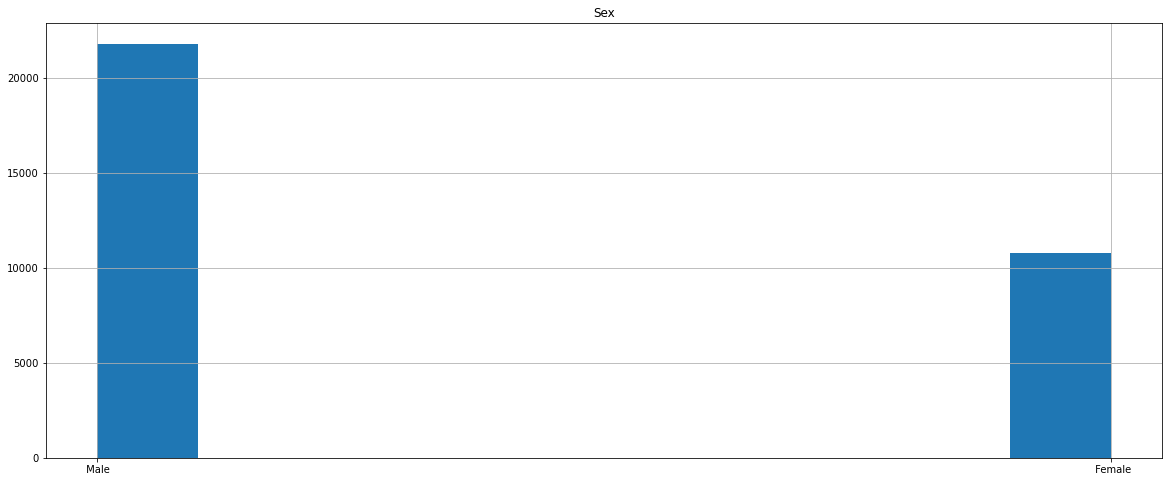

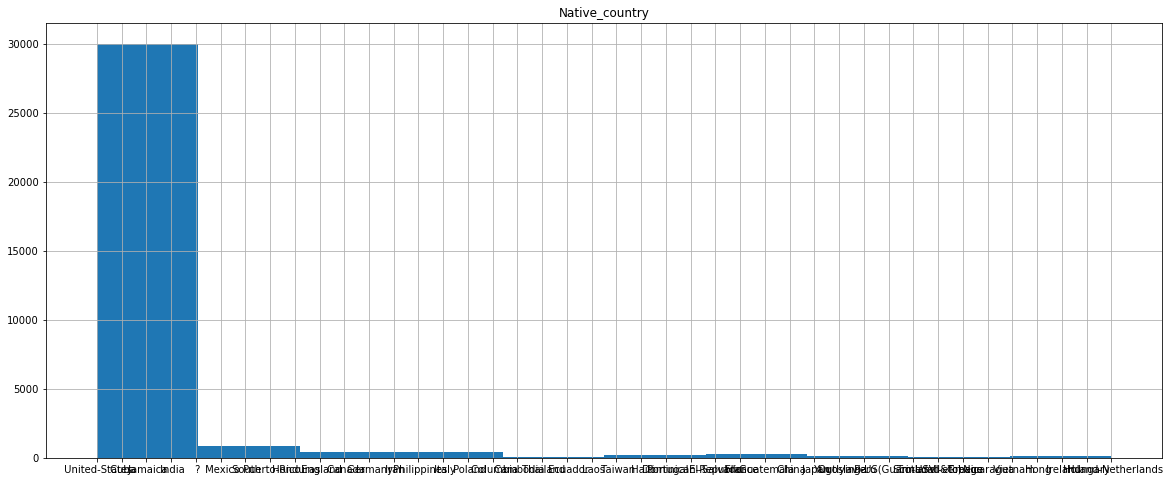

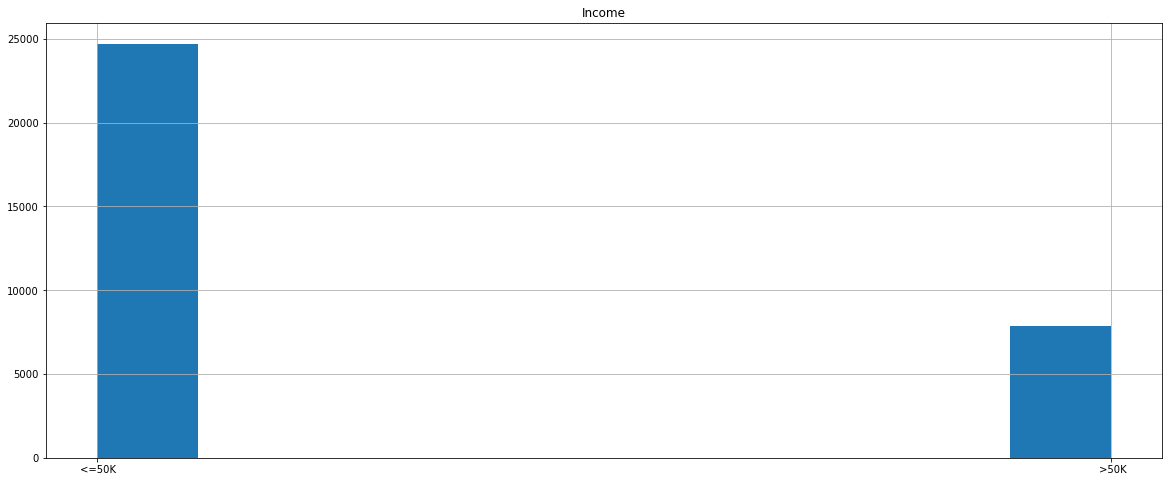

In [20]:
#Univariate analysis
for i in cat_coloumn:                                 
    plt.figure(figsize = (20, 8))
    df[i].hist(grid = True)
    plt.title(i)
    plt.show()

In [21]:
df.loc[df['Occupation'] == ' ?']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
26,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
60,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
68,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
76,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
105,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32529,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32530,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32538,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32540,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [22]:
df.loc[df['Workclass'] == ' ?']


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
26,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
60,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
68,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
76,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
105,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32529,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32530,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32538,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32540,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


Here we can see there are missing values with "?" present in "Occupation" and "Workclass". 

<AxesSubplot:>

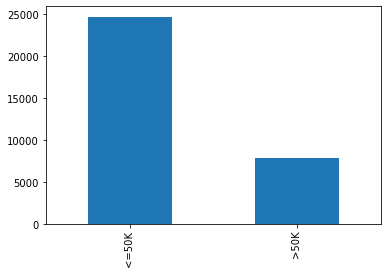

In [23]:
df['Income'].value_counts().plot(kind='bar')

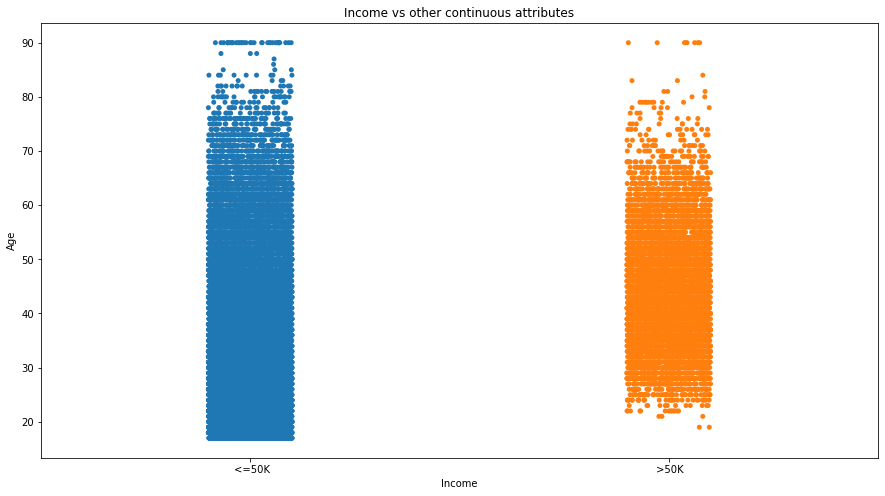

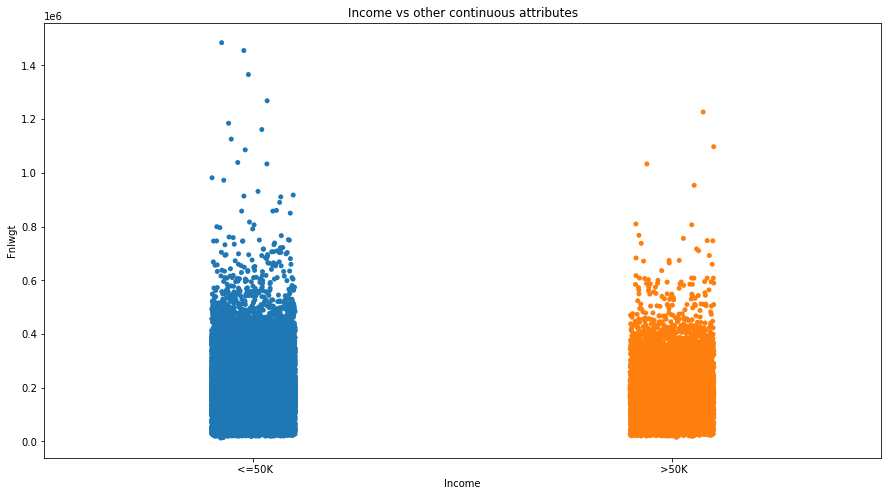

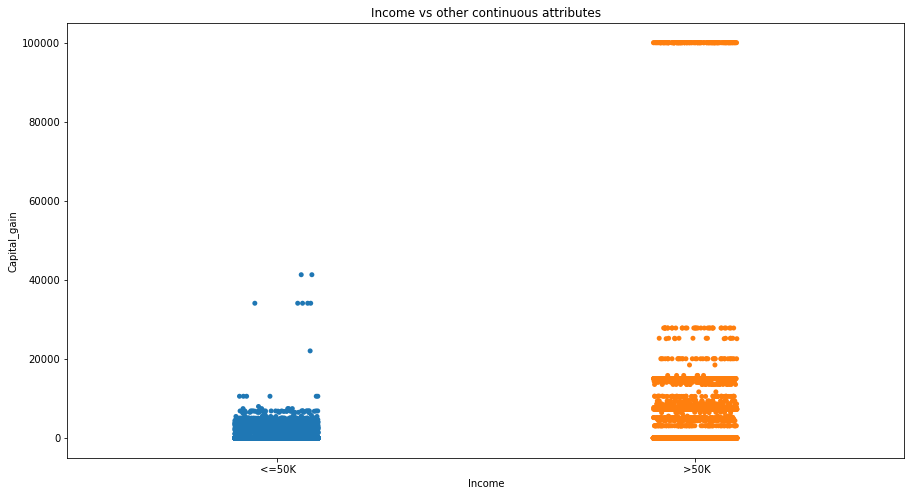

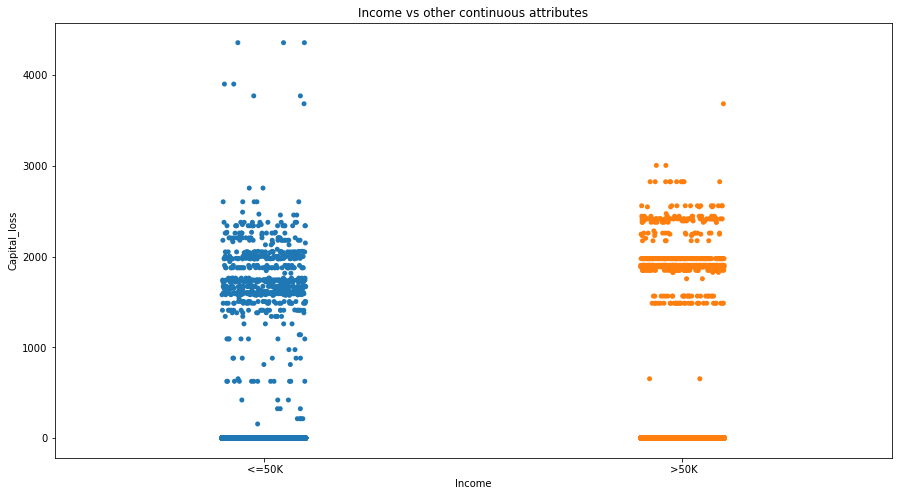

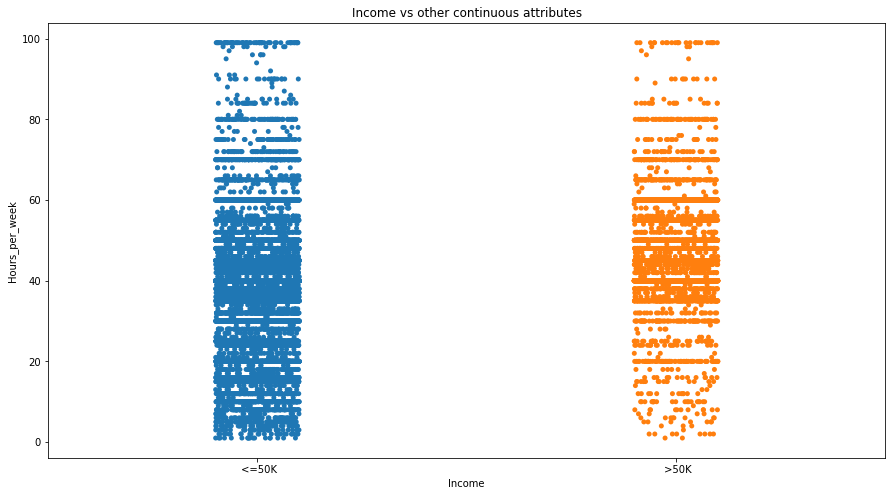

In [25]:
#Bivariate analysis for continuous columns.

for i in cont_coloumn:               
    plt.figure(figsize = (15, 8))
    ax = sns.stripplot(df['Income'], df[i])
    ax.set(xlabel = 'Income', ylabel = i)
    plt.title('Income vs other continuous attributes')
    plt.show()

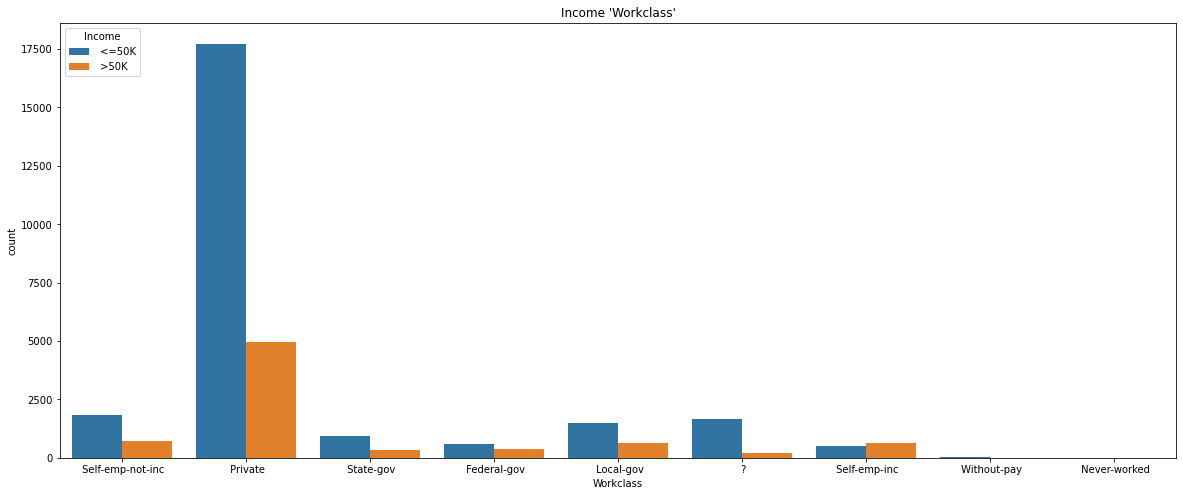

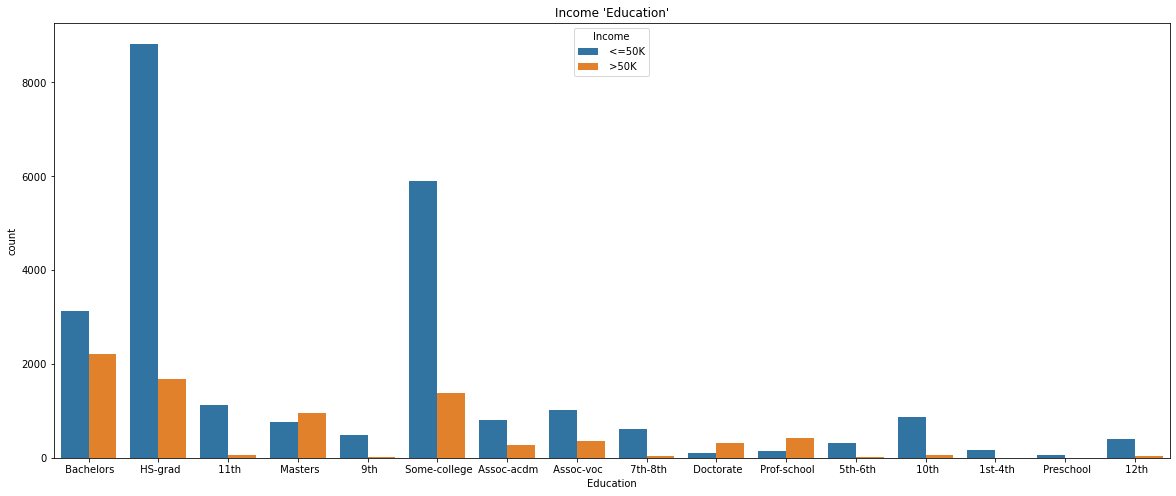

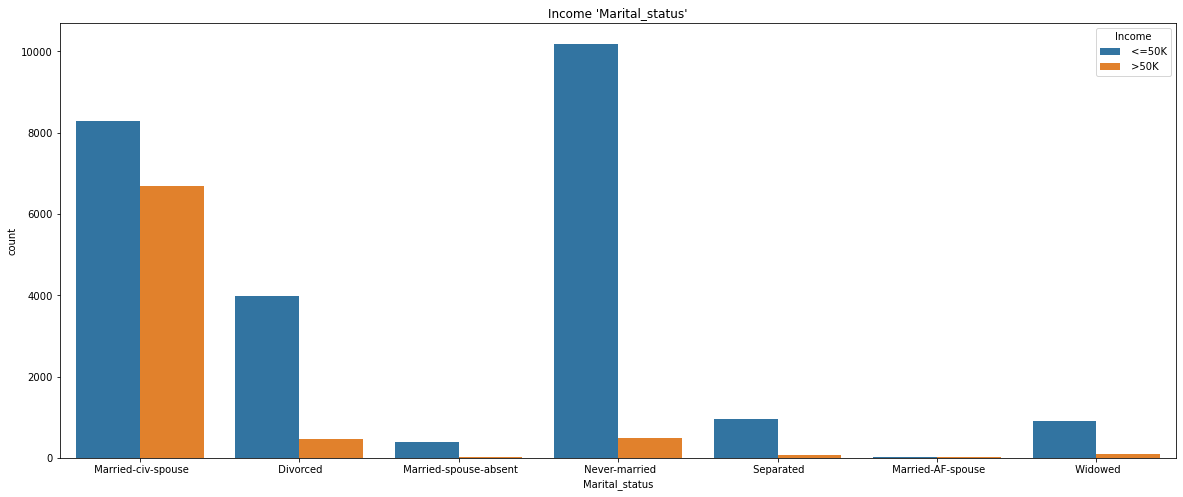

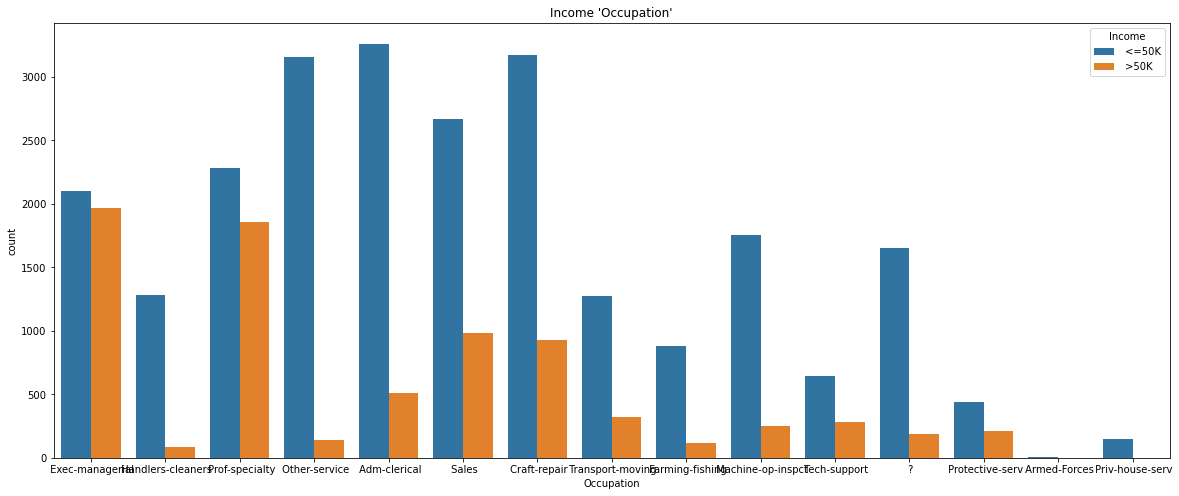

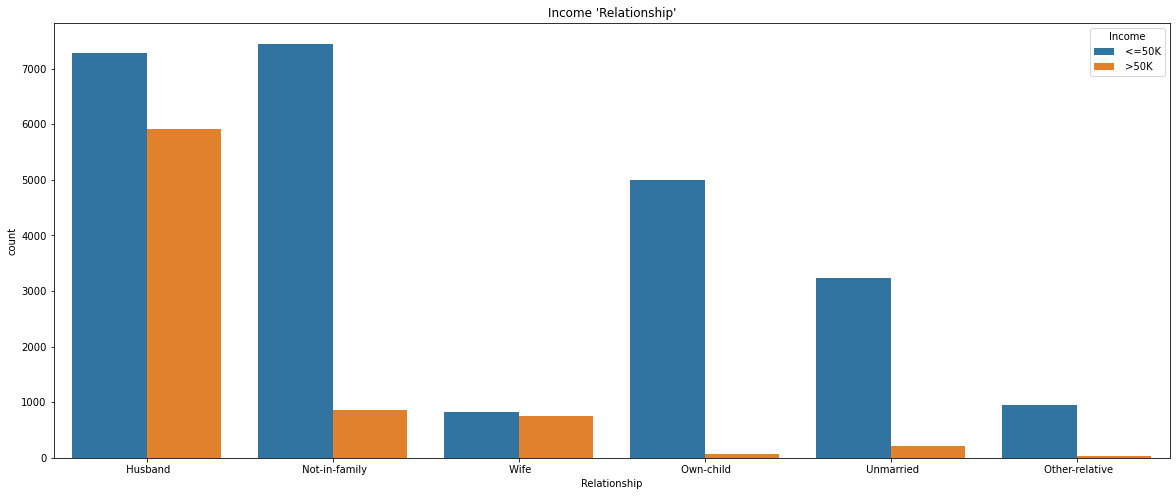

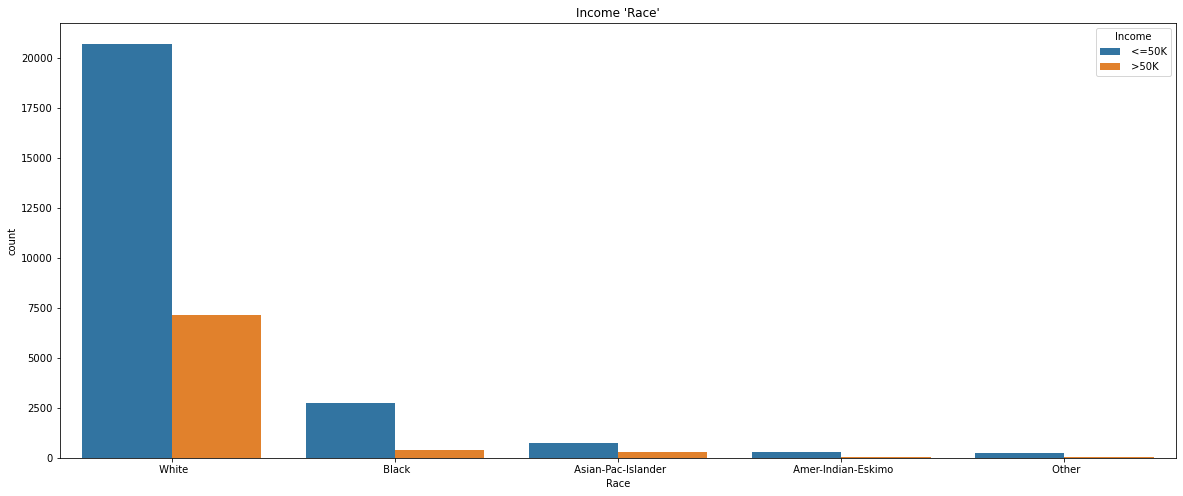

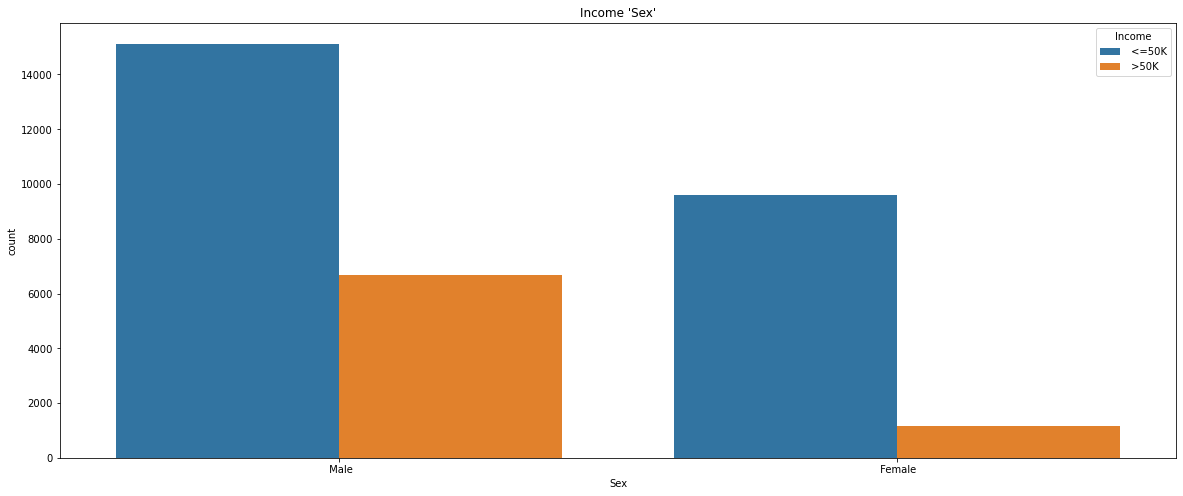

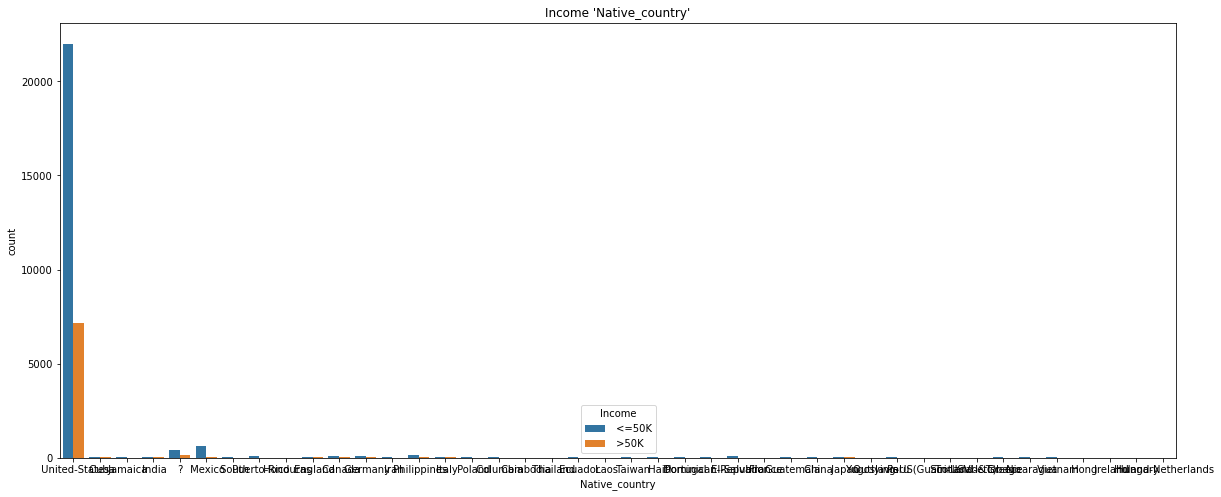

In [27]:
#Bivariate analysis for categorical coloumns.

for i in cat_coloumn[:-1]:                                
    plt.figure(figsize=(20, 8))
    plt.title("Income '%s'"%i)
    sns.countplot(df[i],hue=df['Income'])

In [28]:
df['Income'].replace(' <=50K', 0, inplace = True)
df['Income'].replace(' >50K', 1, inplace = True)

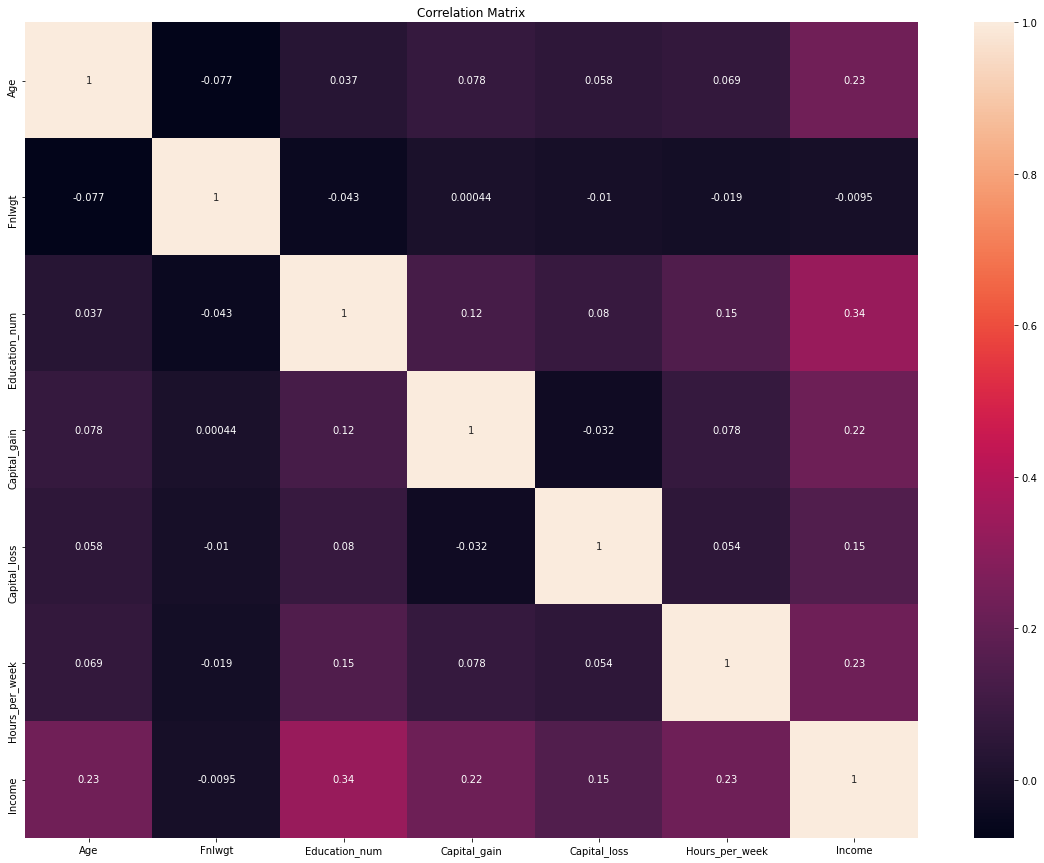

In [29]:
#Plotting heatmap correlation matrix.
plt.figure(figsize = [20, 15])                             
sns.heatmap(df.corr(), annot = True)
plt.title('Correlation Matrix')
plt.show()

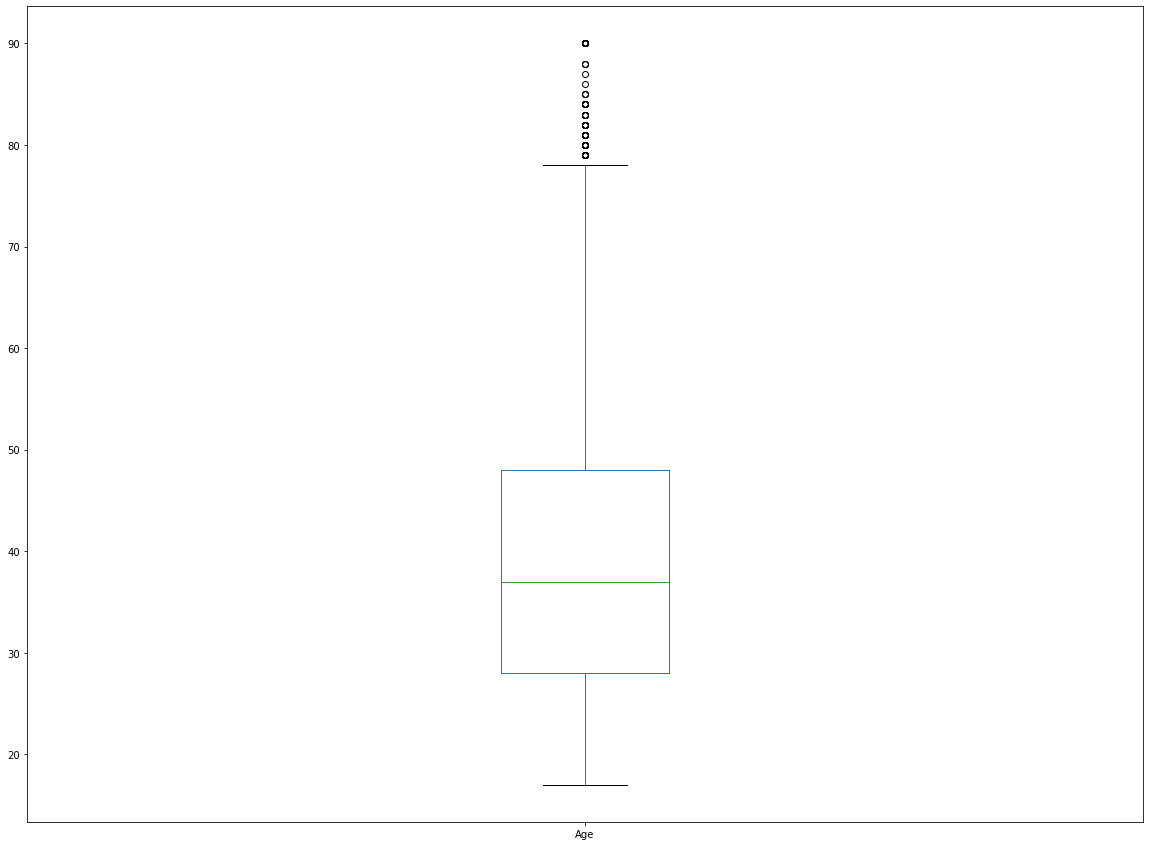

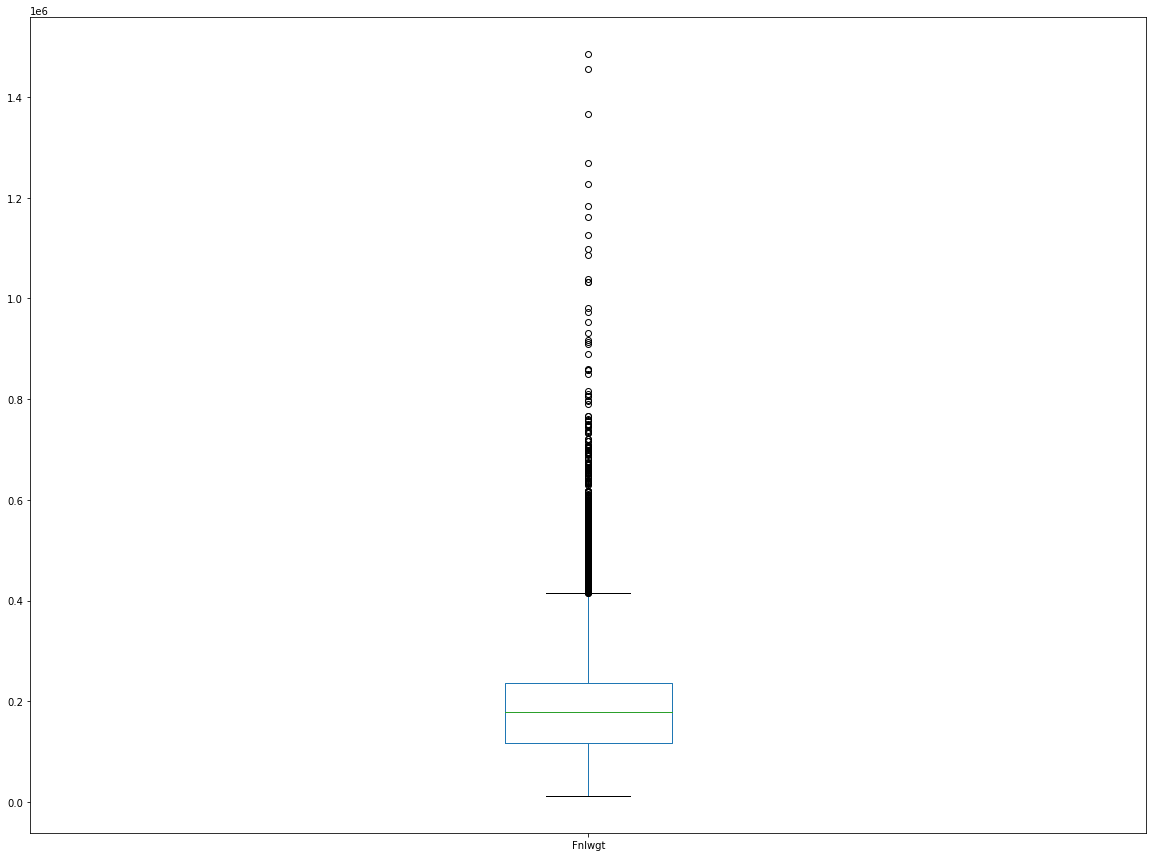

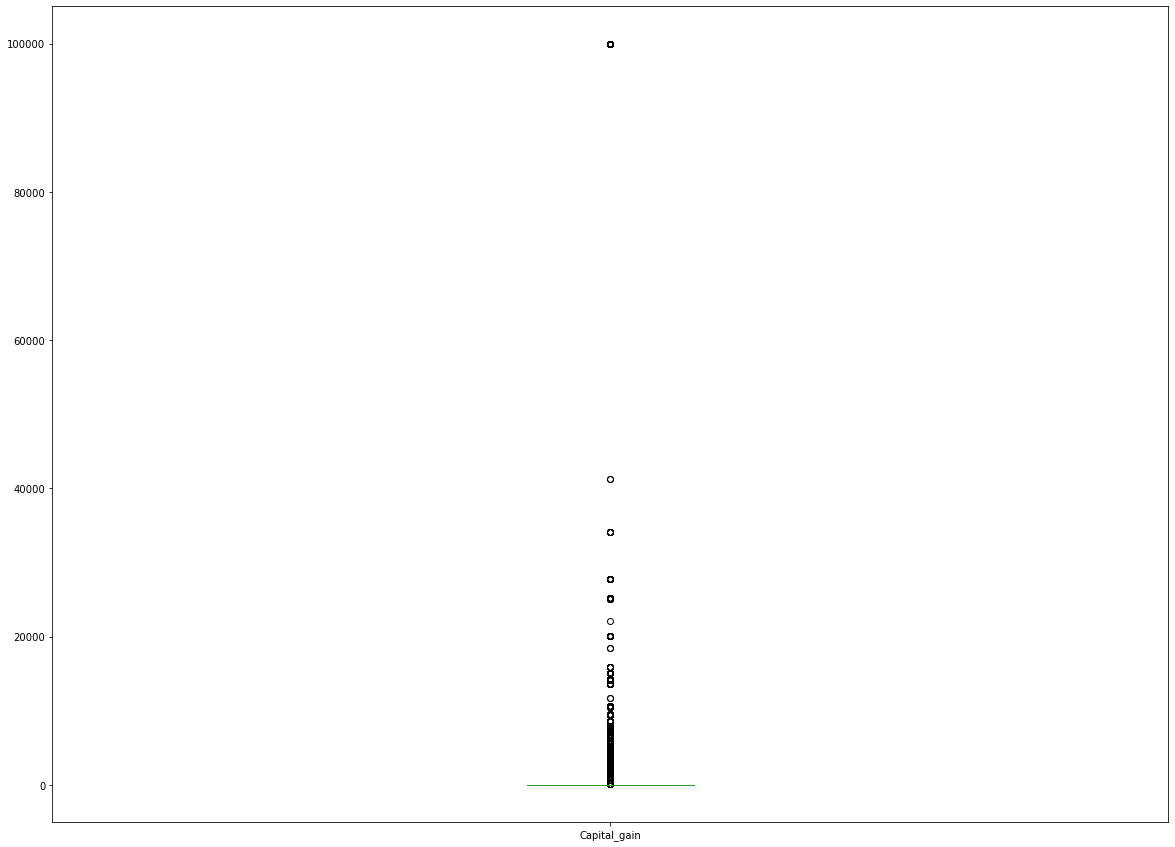

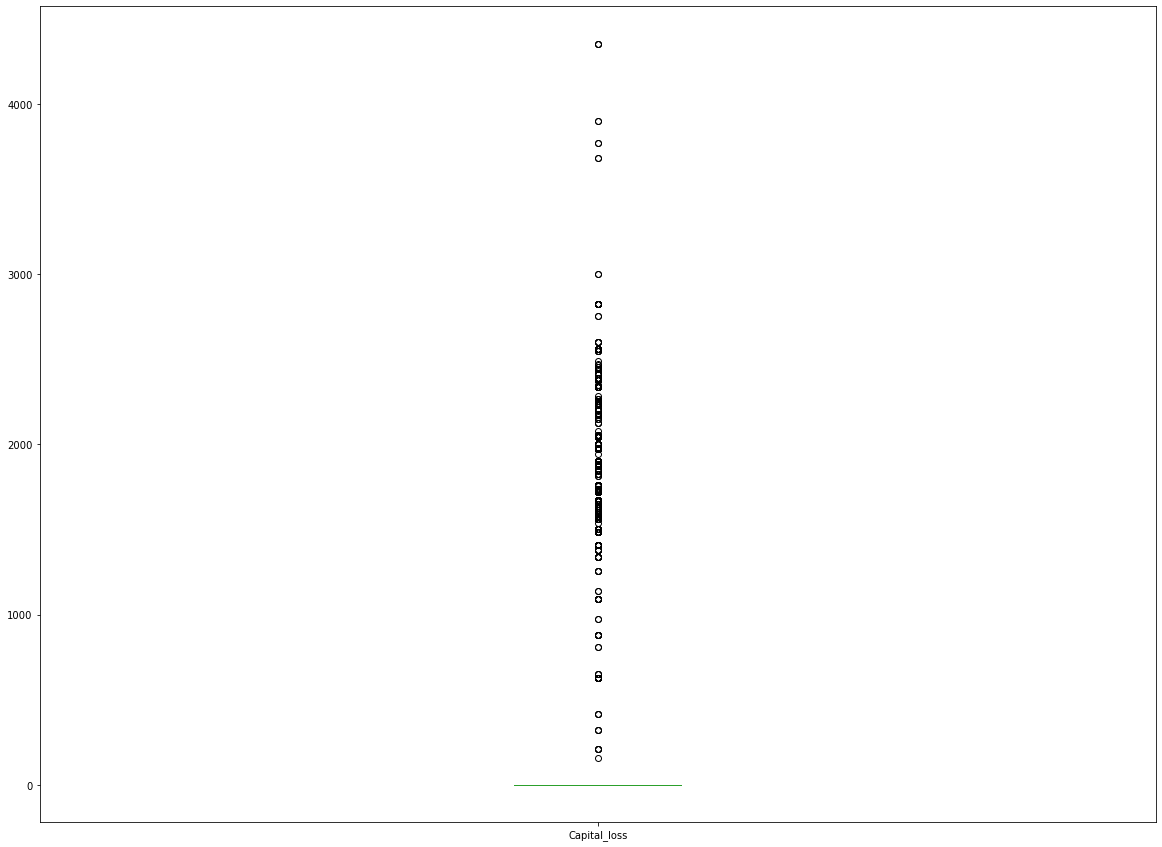

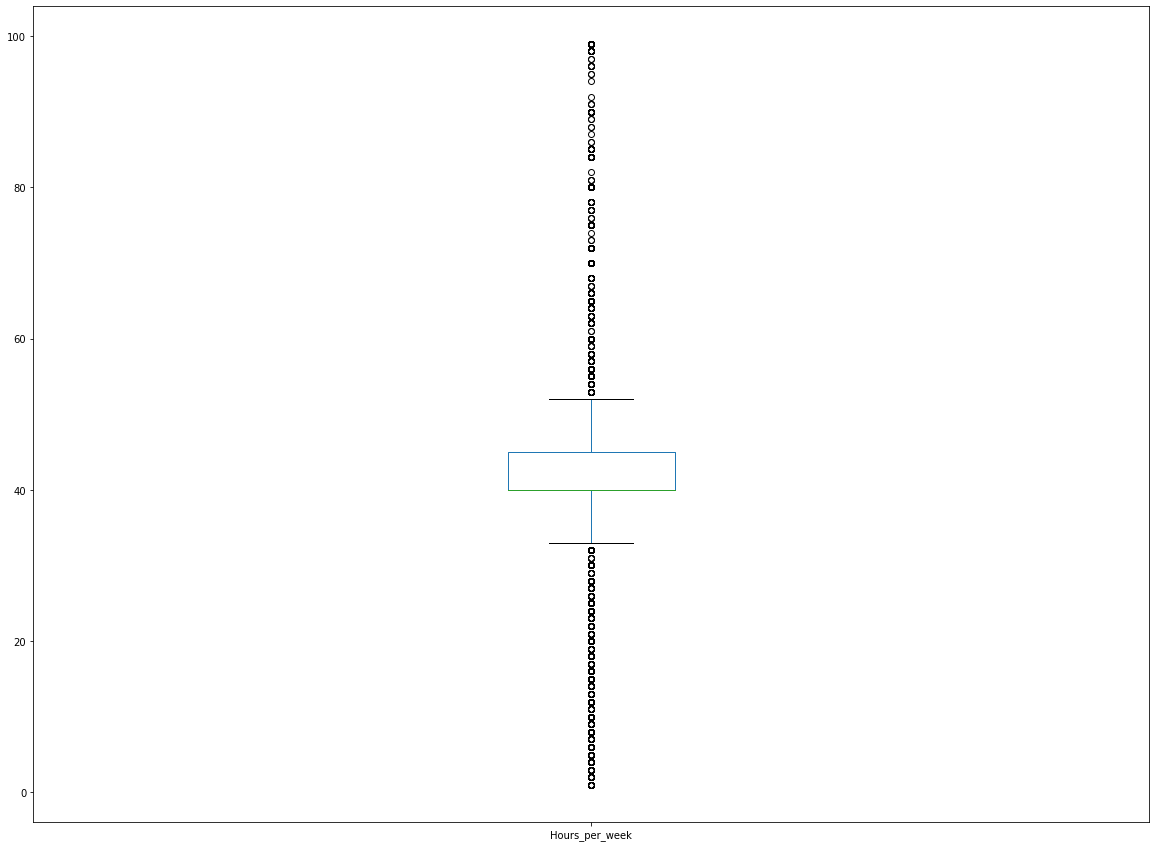

In [31]:
#Checking for outliers and skewness.
for i in cont_coloumn:
    plt.figure(figsize = (20, 15))
    df[i].plot.box()

In [32]:
df.skew()

Age                0.558738
Fnlwgt             1.446972
Education_num     -0.311630
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Income             1.212383
dtype: float64

In [35]:
cont_coloumn.remove('Age')
cont_coloumn.remove('Hours_per_week')

In [36]:
df_new = df

In [37]:
df.head(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,1


In [39]:
# Removing skewness by using yeo-johnson method.

from sklearn.preprocessing import power_transform        
df_new[cont_coloumn] = power_transform(df[cont_coloumn], method='yeo-johnson')        
df_new = pd.DataFrame(df_new, columns = df.columns)

In [40]:
df_new.skew()

Age               0.558738
Fnlwgt            0.016914
Education_num    -0.311630
Capital_gain      3.016951
Capital_loss      4.299511
Hours_per_week    0.227636
Income            1.212383
dtype: float64

Skewness has been reduced significantly, even though it is still very high.

In [44]:
tp = (df.dtypes == 'object')
object_columns = list(tp[tp].index)

print(object_columns)

['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country']


In [47]:
object_columns.remove('Education')

In [55]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in object_columns:
    df_new[col] = label_encoder.fit_transform(df_new[col])

Label Encoded all the object columns, except for Education

In [56]:
#Droping education column since we have education_num in our dataset.
df_new = df_new.drop('Education', axis = 1)

In [57]:
x = df_new.drop('Income', axis = 1)
y = df_new['Income']

In [58]:
maxacr = 0
maxrst = 0

for i in range (1, 500):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc > maxacr:
        maxacr = acc
        maxrst = i
print ('Max Accuracy is', maxacr, 'on Random State', maxrst)

Max Accuracy is 0.8271908271908271 on Random State 448


In [ ]:
#Splitting data into train test split.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 448)

In [59]:
LR = LogisticRegression()
nb = GaussianNB()
DTC = DecisionTreeClassifier()
svc = SVC()
rf = RandomForestClassifier()
models = [LR, nb, DTC, svc, rf]
for i in models:
    print (i)
    i.fit(x_train, y_train)
    pred = i.predict(x_test)
    print (accuracy_score(y_test, pred))
    print (confusion_matrix(y_test, pred))
    print (classification_report(y_test, pred))

LogisticRegression()
0.8156224406224406
[[6913  531]
 [1270 1054]]
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      7444
           1       0.66      0.45      0.54      2324

    accuracy                           0.82      9768
   macro avg       0.75      0.69      0.71      9768
weighted avg       0.80      0.82      0.80      9768

GaussianNB()
0.8097870597870598
[[6564  880]
 [ 978 1346]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      7444
           1       0.60      0.58      0.59      2324

    accuracy                           0.81      9768
   macro avg       0.74      0.73      0.73      9768
weighted avg       0.81      0.81      0.81      9768

DecisionTreeClassifier()
0.8070229320229321
[[6463  981]
 [ 904 1420]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      7444
           1       0.59      0.61      0

In [60]:
for i in models:
    cvs = cross_val_score(i, x, y, cv = 5)
    print ('Cross Validation Score for ',i, ' model is :', cvs.mean())
    print (' ')

Cross Validation Score for  LogisticRegression()  model is : 0.8141277641277641
 
Cross Validation Score for  GaussianNB()  model is : 0.8102272727272728
 
Cross Validation Score for  DecisionTreeClassifier()  model is : 0.8017199017199017
 
Cross Validation Score for  SVC()  model is : 0.8196867321867322
 
Cross Validation Score for  RandomForestClassifier()  model is : 0.8537776412776411
 


Random forest classifier model is giving highest accuray and rest models has very close difference in between accuracy score and cross validation score

# Hyperparameter tuning

In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']}

In [63]:
rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 3)
rfc.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [64]:
rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [65]:
rfc1=RandomForestClassifier(random_state=448, max_features='sqrt', n_estimators= 200, max_depth=8, criterion='entropy')
rfc1.fit(x_train, y_train)
predrfc1 = rfc1.predict(x_test)
print (accuracy_score(y_test, predrfc1))
print (confusion_matrix(y_test, predrfc1))
print (classification_report(y_test, predrfc1))

0.8476658476658476
[[7109  335]
 [1153 1171]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.91      7444
           1       0.78      0.50      0.61      2324

    accuracy                           0.85      9768
   macro avg       0.82      0.73      0.76      9768
weighted avg       0.84      0.85      0.84      9768



In [66]:
cvs = cross_val_score(rfc1, x, y, cv = 5)
print ('Cross Validation Score for ',rfc1, ' model is :', cvs.mean())

Cross Validation Score for  RandomForestClassifier(criterion='entropy', max_depth=8, max_features='sqrt',
                       n_estimators=200, random_state=448)  model is : 0.8513513513513512


There is no much improvement in accuracy and cross validation score.

In [1]:
import pickle

In [2]:
file = 'CencusIncome.pkl'
pickle.dump(rfc1, open(file, 'wb'))

NameError: name 'rfc1' is not defined